In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

The df - "data" contains all the cleaned and labelled financial data

In [3]:
data = pd.read_csv('cleaned_financial_data.csv')

In [4]:
data = data.drop(columns = ['Revenue', 'Difference between normalised pat and pat reported by company', 'Deposits (accepted by commercial banks)'])

In [5]:
data.columns

Index(['Name', 'Company code', 'Total income', 'Sales', 'Sales returns',
       'Net sales', 'Sales / Net fixed assets', 'Change in stock',
       'Total expenses', 'Profit after tax',
       'Profit after tax reported by company', 'PBDITA', 'PBPT', 'PBT', 'PBIT',
       'Cash profit', 'Depreciation as % of PBDITA',
       'Amortisation as % of PBDITA', 'PAT as % of PBDITA',
       'Total liabilities', 'Total capital', 'Reserves and funds',
       'Capital, debt, investment & other reserves',
       'Surplus/deficit as at the end of the year',
       'Retained profits/losses during the year', 'Non-current liabilities',
       'Long term borrowings excl current portion',
       'Long term debentures and bonds',
       'Interest accrued and due (long term) on borrowings',
       'Long term fixed deposits', 'Other long term borrowings',
       'Other long term liabilities', 'Current liabilities & provisions',
       'Current liabilities', 'Short-term borrowings',
       'Short term debent

In [6]:
numeric_columns = ['Total income', 'Sales', 'Sales returns',
       'Net sales', 'Sales / Net fixed assets', 'Change in stock',
       'Total expenses', 'Profit after tax',
       'Profit after tax reported by company', 'PBDITA', 'PBPT', 'PBT', 'PBIT',
       'Cash profit', 'Depreciation as % of PBDITA',
       'Amortisation as % of PBDITA', 'PAT as % of PBDITA',
       'Total liabilities', 'Total capital', 'Reserves and funds',
       'Capital, debt, investment & other reserves',
       'Surplus/deficit as at the end of the year',
       'Retained profits/losses during the year', 'Non-current liabilities',
       'Long term borrowings excl current portion',
       'Long term debentures and bonds',
       'Interest accrued and due (long term) on borrowings',
       'Long term fixed deposits', 'Other long term borrowings',
       'Other long term liabilities', 'Current liabilities & provisions',
       'Current liabilities', 'Short-term borrowings',
       'Short term debentures and bonds', 'Short term fixed deposits', 'Debt',
       'Debt to equity ratio (times)', 'Total assets', 'Non-current assets',
       'Net fixed assets', 'Net intangible assets',
       'Net property, plant and equipment',
       'Gross property, plant and equipment',
       'Depreciation on PPE for the year',
       'Net tangible assets (break up not available)',
       'Term loans (long term)', 'Long term investments',
       'Long term loans & advances', 'Other long term assets',
       'Current assets (incl. short term investments, loans & advances)',
       'Short term investments', 'Cash balance', 'Short term loans & advances',
       'Short term investments to current assets', 'Net working capital',
       'Net working capital (cost of sales method)', 'Quick ratio (times)',
       'Current ratio (times)', 'Cash to current liabilities (times)',
       'WIP turnover (times)', 'Creditors turnover (times)',
       'Net cash flow from operating activities',
       'Adjustments for depreciation & amortisation in cash flow statement',
       'Operating cash flow before working capital changes',
       'Cash outflow from finance activities',
       'Cash outflow from investment activities',
       'Profit or loss on sale of assets', 'Change in cash and bank balance',
       'Change in current liab and provisions', 'Change in PAT net of P&E',
       'Change in sales', 'Change in total income',
       'Change in working capital', 'Change in working capital assets',
       'Change in working capital liabilities']
non_numeric_columns = ['Name','Company code','Label']

In [7]:
X = data[numeric_columns]
y = data['Label']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
classifiers = {
    "Decision Tree" : DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 10, random_state = 0),
    "Random Forest" : RandomForestClassifier(n_estimators = 150, max_depth = 15, criterion = 'gini', random_state = 42)
}

In [22]:
clf_dt = classifiers["Decision Tree"]
clf_rf = classifiers["Random Forest"]

In [23]:
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

In [24]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

# printing the metrics (macro values for precision, recall and F1-Score)
print(f'Metrics for the Decision Tree Classifier: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Metrics for the Decision Tree Classifier: 
Accuracy: 0.9863
Precision: 0.7545
Recall: 0.6282
F1_Score: 0.6697


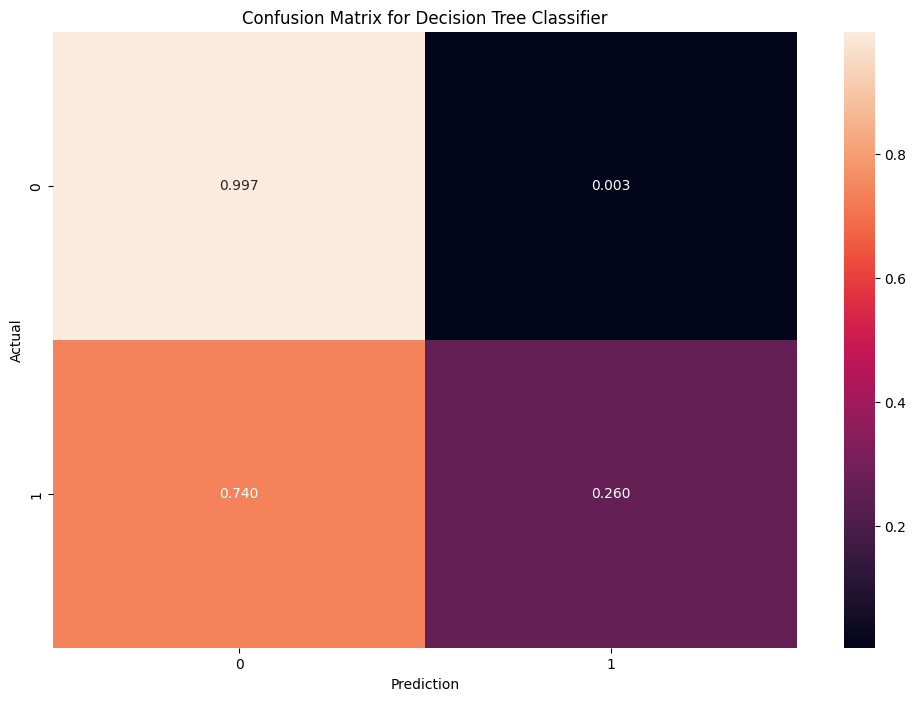

<Figure size 640x480 with 0 Axes>

In [25]:
# making the confusion matrix for the same
cnf_matrix_dt = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_dt = cnf_matrix_dt.astype('float')/cnf_matrix_dt.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_dt,annot = True, fmt = '.3f',)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Decision Tree Classifier')
plt.show()
plt.savefig('DT Classifier For Bankruptcy Prediction')

In [26]:
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

In [27]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

# printing the metrics (macro values for precision, recall and F1-Score)
print(f'Metrics for the Random Forest Classifier: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Metrics for the Random Forest Classifier: 
Accuracy: 0.9875
Precision: 0.9937
Recall: 0.5519
F1_Score: 0.5910


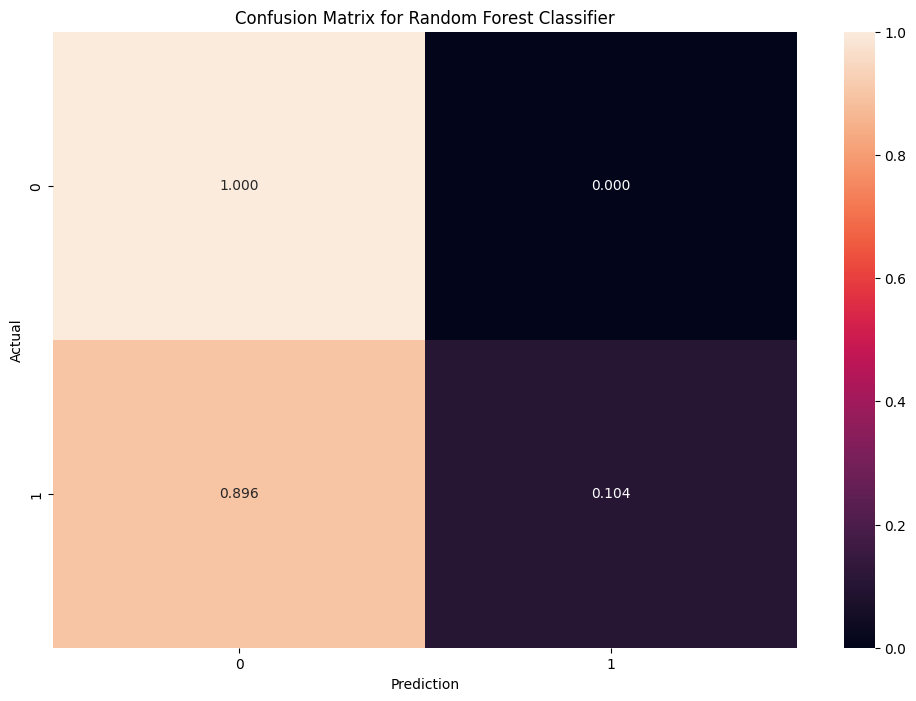

<Figure size 640x480 with 0 Axes>

In [28]:
# making the confusion matrix for the same
cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_rf = cnf_matrix_rf.astype('float')/cnf_matrix_rf.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_rf,annot = True, fmt = '.3f',)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.show()
plt.savefig('RF Classifier For Bankruptcy Prediction')

The DT and RF classifiers show very poor results, and using the heatmap we can see that the misclassification rate of bankrupt companies is very high (67% in DT and 90% in RF)